# 1. 加载数据
加载训练集数据，并输出数据集大小

In [15]:
import numpy as np

# 加载训练集数据
X_train = np.load('../data_set/X_train.npy')

X_train  # 输出训练集数据

array([[57.,  5.,  0., ...,  0.,  0.,  0.],
       [71.,  2.,  2., ...,  0.,  0.,  1.],
       [64.,  2.,  0., ...,  0.,  0.,  0.],
       ...,
       [46.,  4.,  0., ...,  1.,  0.,  0.],
       [70.,  2.,  1., ...,  0.,  0.,  0.],
       [60.,  2.,  0., ...,  0.,  0.,  0.]])

In [16]:
X_train.shape  # 输出训练集大小

(1000, 111)

# 2. 清理数据
清理去除以下特征：
- 缺失率高于阈值(90%)的特征
- 一元特征
重新输出清理后的数据集大小

In [17]:
# 计算每个特征的缺失值比例
missing_ratio = np.mean(np.isnan(X_train), axis=0)

missing_ratio  # 输出每个特征的缺失值比例

array([0.005, 0.   , 0.002, 0.067, 0.046, 0.034, 0.963, 0.005, 0.004,
       0.153, 0.034, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016,
       0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.002, 0.002,
       0.002, 0.003, 0.003, 0.003, 0.003, 0.003, 0.644, 0.644, 0.161,
       0.161, 0.007, 0.008, 0.009, 0.007, 0.007, 0.007, 0.051, 0.05 ,
       0.048, 0.043, 0.   , 0.096, 0.096, 0.096, 0.096, 0.096, 0.096,
       0.069, 0.069, 0.069, 0.069, 0.069, 0.069, 0.069, 0.069, 0.069,
       0.068, 0.068, 0.068, 0.068, 0.068, 0.068, 0.068, 0.068, 0.068,
       0.068, 0.068, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006,
       0.201, 0.201, 0.204, 0.204, 0.174, 0.175, 0.998, 0.074, 0.115,
       0.08 , 0.009, 0.069, 0.08 , 0.371, 0.392, 0.382, 0.003, 0.003,
       0.068, 0.082, 0.007, 0.069, 0.081, 0.005, 0.004, 0.005, 0.008,
       0.008, 0.007, 0.007])

In [18]:
# 定义高缺失率阈值为90%
# high_missing_ratio_threshold = 0.9
#
# # 标记应删除的特征
# features_to_drop_high_missing = np.where(missing_ratio > high_missing_ratio_threshold)[0]
# 
# # 计算每个特征的唯一值数量
# unique_counts = np.apply_along_axis(lambda col: len(np.unique(col[~np.isnan(col)])), 0, X_train)
# 
# # 一元特征的索引
# single_value_feature_indices = np.where(unique_counts == 1)[0]
# 
# # 删除高缺失率特征和一元特征
# X_dropped_high_missing = np.delete(X_train,
#                                    np.concatenate([features_to_drop_high_missing, single_value_feature_indices]),
#                                    axis=1)
#
# 输出删除高缺失率特征和一元特征后的数据集大小
# features_to_drop_high_missing, single_value_feature_indices, X_dropped_high_missing.shape


`drop_high_missing_features`是一个函数，它的主要功能是删除数据集中缺失值过多的特征。
这个函数接收两个参数：`data`和`threshold`。
`data`是需要处理的数据集，`threshold`是设定的缺失值比例阈值。

首先，函数会计算每个特征的缺失值比例
然后，函数会找出缺失值比例超过阈值的特征
最后，函数会删除这些特征，并返回处理后的数据集

`drop_high_missing_features`函数可以帮助我们清理数据，提高模型的准确性。

In [19]:
def drop_high_missing_features(X, missing_ratio, threshold):
    features_to_drop = np.where(missing_ratio > threshold)[0]
    X_dropped = np.delete(X, features_to_drop, axis=1)
    return features_to_drop, X_dropped


feature_drop_90, X_drop_90 = drop_high_missing_features(X_train, missing_ratio, 0.9)
feature_drop_60, X_drop_60 = drop_high_missing_features(X_train, missing_ratio, 0.6)

# 保存删除高缺失率特征和一元特征后的数据
np.save('../data_set/drop_90/X_drop.npy', X_drop_90)
np.save('../data_set/drop_60/X_drop.npy', X_drop_60)

# 输出删除高缺失率特征和一元特征后的数据集大小
feature_drop_90, X_drop_90.shape, feature_drop_60, X_drop_60.shape

(array([ 6, 87], dtype=int64),
 (1000, 109),
 array([ 6, 33, 34, 87], dtype=int64),
 (1000, 107))

# 3. 特征类型分类
对特征进行分类，离散型和连续型

In [20]:
# # 加载删除高缺失率特征后的数据
# X_drop = np.load('../data_set/processed_data_set/X_drop.npy')
# 
# # 确定每个特征的唯一值数量
# unique_counts = np.apply_along_axis(lambda col: len(np.unique(col[~np.isnan(col)])), 0, X_drop)
# 
# # 使用唯一值数量与样本总数的比例来推断特征类型
# # 设定一个阈值
# # 如果唯一值占总样本数的比例小于5%是离散型特征，否则是连续型特征
# threshold_ratio = 0.05
# discrete_feature_indices = np.where((unique_counts / X_train.shape[0]) < threshold_ratio)[0]
# continuous_feature_indices = np.where((unique_counts / X_train.shape[0]) >= threshold_ratio)[0]
# 
# discrete_feature_indices, continuous_feature_indices  # 输出离散型和连续型特征的索引

## 3.1 连续性特征分类为整数型和浮点型

In [21]:
# # 初始化列表来保存整数型和浮点型连续特征的索引
# continuous_integer_indices = []
# continuous_float_indices = []
# 
# # 遍历所有连续型特征，检查它们是整数型还是浮点型
# for index in continuous_feature_indices:
#     if np.all(np.mod(X_train[:, index][~np.isnan(X_train[:, index])], 1) == 0):
#         continuous_integer_indices.append(index)
#     else:
#         continuous_float_indices.append(index)
# 
# continuous_integer_indices, continuous_float_indices

这段代码`classify_features`的目的是帮助你自动地将数据集中的特征分类为离散型、连续性整型和连续性浮点型三种类型。通过这种分类，你可以更好地理解你的数据集，并根据特征类型采取不同的数据预处理或特征工程策略。

In [27]:
def classify_features(X_dataset, threshold_ratio=0.05):
    """
    Classify features of the dataset into discrete, continuous integer, and continuous float categories.

    Parameters:
    - X_dataset: The dataset to classify features for.
    - threshold_ratio: The threshold ratio to determine if a feature is discrete or continuous.

    Returns:
    - discrete_feature_indices: Indices of discrete features.
    - continuous_integer_indices: Indices of continuous integer features.
    - continuous_float_indices: Indices of continuous float features.
    """
    # Determine the unique counts for each feature
    unique_counts = np.apply_along_axis(lambda col: len(np.unique(col[~np.isnan(col)])), 0, X_dataset)

    # Determine feature types based on the proportion of unique values

    discrete_feature_indices = np.where((unique_counts / X_dataset.shape[0]) < threshold_ratio)[0]
    continuous_feature_indices = np.where((unique_counts / X_dataset.shape[0]) >= threshold_ratio)[0]

    # Initialize lists to save indices of continuous integer and float features
    continuous_integer_indices = []
    continuous_float_indices = []

    # Classify continuous features into integer and float
    for index in continuous_feature_indices:
        if np.all(np.mod(X_dataset[:, index][~np.isnan(X_dataset[:, index])], 1) == 0):
            continuous_integer_indices.append(index)
        else:
            continuous_float_indices.append(index)

    return discrete_feature_indices, continuous_integer_indices, continuous_float_indices


# Example usage
X_drop = np.load('../data_set/drop_90/X_drop.npy')

# Classify features of the dataset
discrete_indices, continuous_int_indices, continuous_float_indices = classify_features(X_drop)

print("Discrete feature indices:", discrete_indices)
print("Continuous integer feature indices:", continuous_int_indices)
print("Continuous float feature indices:", continuous_float_indices)


Discrete feature indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  83  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108]
Continuous integer feature indices: [0, 33, 34, 35]
Continuous float feature indices: [82, 84, 85, 86, 87, 88]


按照这个分类，我们将对缺失值采取不同的填充策略：

对于**离散型特征**，我们将使用众数进行填充。
对于**连续浮点型特征**，我们将使用均值进行填充。
对于**连续整数型特征**，我们也将使用均值进行填充，然后对结果进行四舍五入，以确保填充值保持为整数。

In [23]:
# from sklearn.impute import SimpleImputer
# 
# # 对离散型特征使用众数填充
# imputer_mode = SimpleImputer(strategy='most_frequent')
# X_train[:, discrete_feature_indices] = imputer_mode.fit_transform(X_train[:, discrete_feature_indices])
# 
# # 对连续浮点型特征使用均值填充
# imputer_mean = SimpleImputer(strategy='mean')
# X_train[:, continuous_float_indices] = imputer_mean.fit_transform(X_train[:, continuous_float_indices])
# 
# # 对连续整数型特征使用均值填充并四舍五入
# X_continuous_integer = imputer_mean.fit_transform(X_train[:, continuous_integer_indices])
# X_train[:, continuous_integer_indices] = np.round(X_continuous_integer)
# 
# # 保存填充后的数据
# np.save('../data_set/processed_data_set/X_filled.npy', X_train)
# 
# # 验证处理后的数据是否还含有缺失值
# missing_after_imputation = np.isnan(X_train).sum()
# 
# missing_after_imputation


In [24]:
from sklearn.impute import SimpleImputer
import numpy as np


def fill_missing_values(X_dataset):
    """
    Fills missing values in the dataset based on the feature type.

    Parameters:
    - X_dataset: The dataset to fill missing values for.

    Returns:
    - X_filled: The dataset with missing values filled.
    """
    # Classify features of the dataset
    discrete_indices, continuous_int_indices, continuous_float_indices = classify_features(X_dataset)

    # Create a copy of the dataset to avoid modifying the original data
    X_filled = X_dataset.copy()

    # For discrete features, use mode to fill missing values
    if len(discrete_indices) > 0:
        imputer_mode = SimpleImputer(strategy='most_frequent')
        X_filled[:, discrete_indices] = imputer_mode.fit_transform(X_filled[:, discrete_indices])

    # For continuous float features, use mean to fill missing values
    if len(continuous_float_indices) > 0:
        imputer_mean = SimpleImputer(strategy='mean')
        X_filled[:, continuous_float_indices] = imputer_mean.fit_transform(X_filled[:, continuous_float_indices])

    # For continuous integer features, use mean and round to fill missing values
    if len(continuous_int_indices) > 0:
        X_continuous_integer = imputer_mean.fit_transform(X_filled[:, continuous_int_indices])
        X_filled[:, continuous_int_indices] = np.round(X_continuous_integer)

    return X_filled


X_filled_90 = fill_missing_values(X_drop_90)
X_filled_60 = fill_missing_values(X_drop_60)
np.save('../data_set/drop_90/X_filled.npy', X_filled_90)
np.save('../data_set/drop_60/X_filled.npy', X_filled_60)

# 验证处理后的数据是否还含有缺失值
missing_90 = np.isnan(X_filled_90).sum()
missing_60 = np.isnan(X_filled_60).sum()

missing_90, missing_60


(0, 0)

# 4. 处理离群值
对连续特征中的离群值进行处理，以提高模型的准确性。

In [25]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# # 加载填充后的数据
# X_cleaned = np.load('../data_set/processed_data_set/X_filled.npy')
# 
# 
# # 定义处理离群值的函数
# def cap_outliers(data, lower_bound, upper_bound):
#     data = np.where(data < lower_bound, lower_bound, data)
#     data = np.where(data > upper_bound, upper_bound, data)
#     return data
# 
# 
# # 遍历每个连续特征
# for feature_index in continuous_feature_indices:  # 使用之前确定的连续特征索引列表
#     feature_data = X_cleaned[:, feature_index]
#     q1, q3 = np.percentile(feature_data[~np.isnan(feature_data)], [25, 75])
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
# 
#     # 检查是否有超出上下界的离群值
#     outlier_indices = np.where((feature_data < lower_bound) | (feature_data > upper_bound))[0]
#     if len(outlier_indices) > 0:
#         print("Feature index {}: {} outliers detected".format(feature_index, len(outlier_indices)))
# 
#         # 可视化特征的箱线图（处理前）
#         sns.boxplot(x=feature_data)
#         plt.title('Box Plot Before Outlier Capping - Feature Index {}'.format(feature_index))
#         plt.show()
# 
#         # 处理离群值
#         X_cleaned[:, feature_index] = cap_outliers(feature_data, lower_bound, upper_bound)
# 
#         # 可视化特征的箱线图（处理后）
#         sns.boxplot(x=X_cleaned[:, feature_index])
#         plt.title('Box Plot After Outlier Capping - Feature Index {}'.format(feature_index))
#         plt.show()
# 
# # 保存处理后的数据
# np.save('../data_set/processed_data_set/X_processed.npy', X_cleaned)


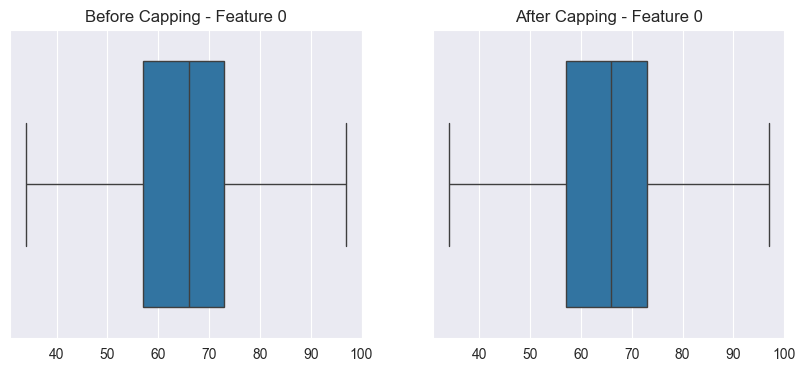

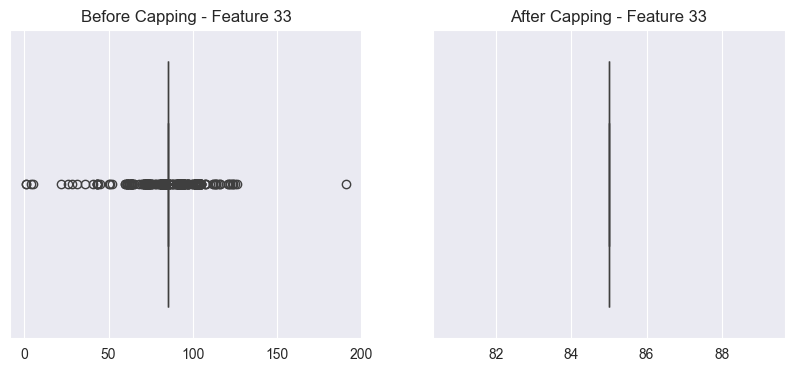

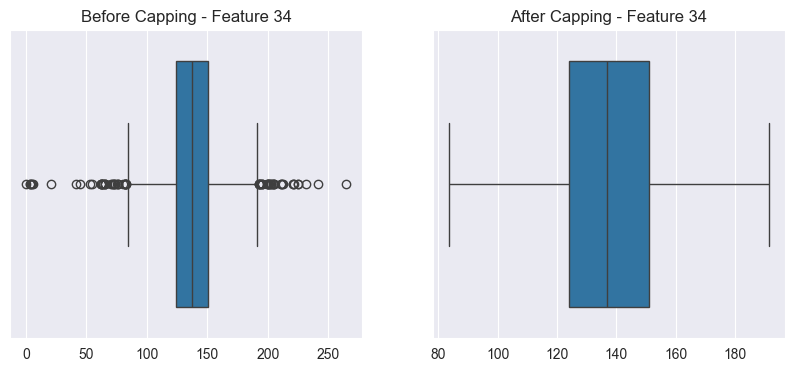

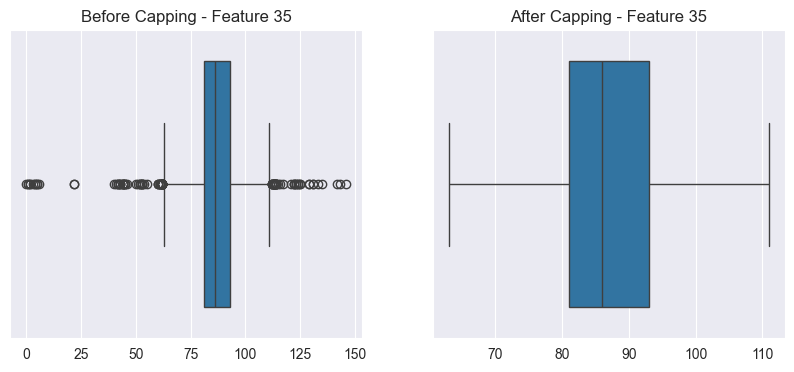

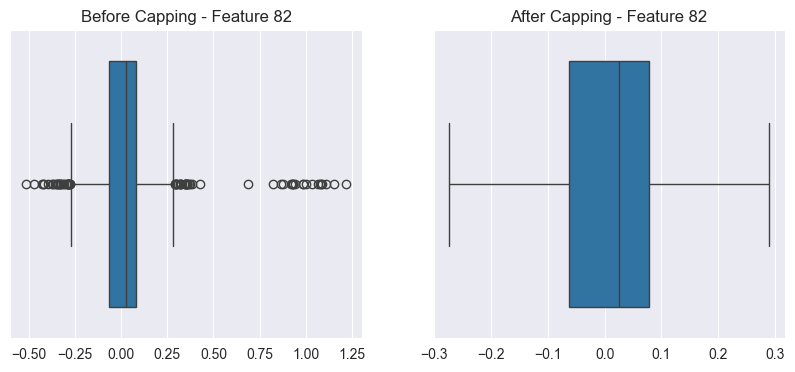

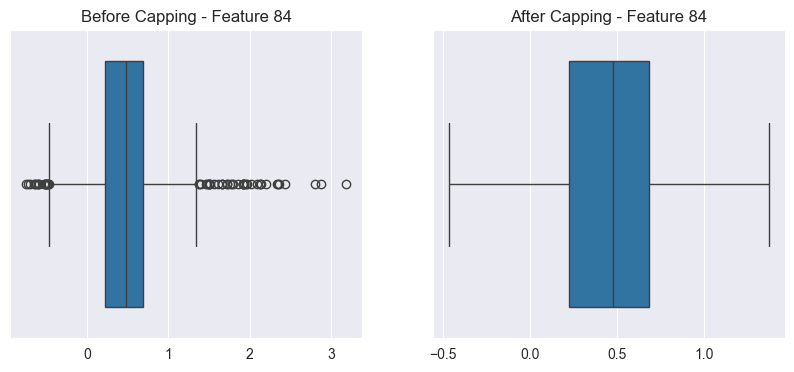

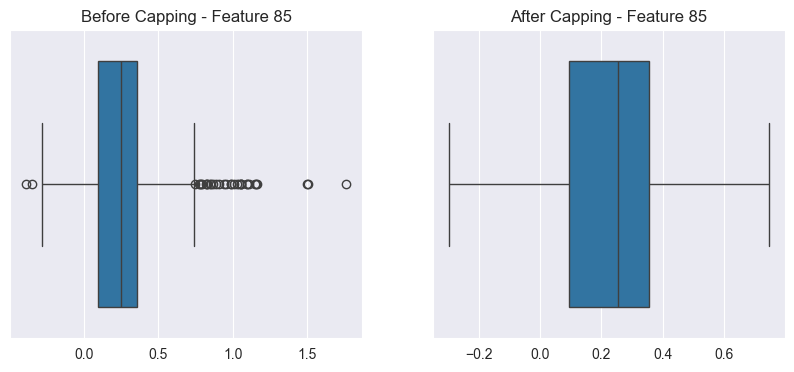

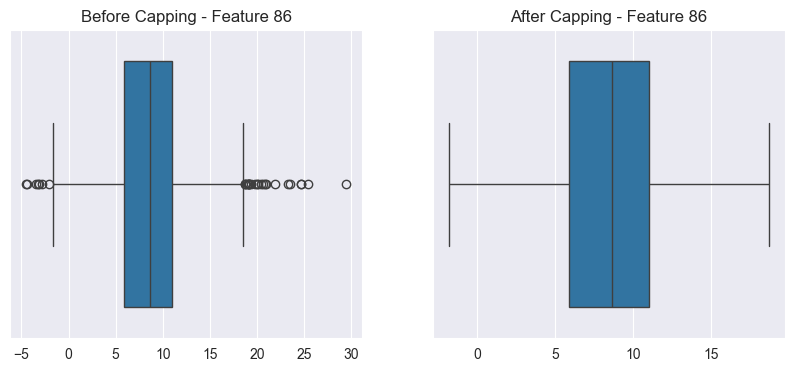

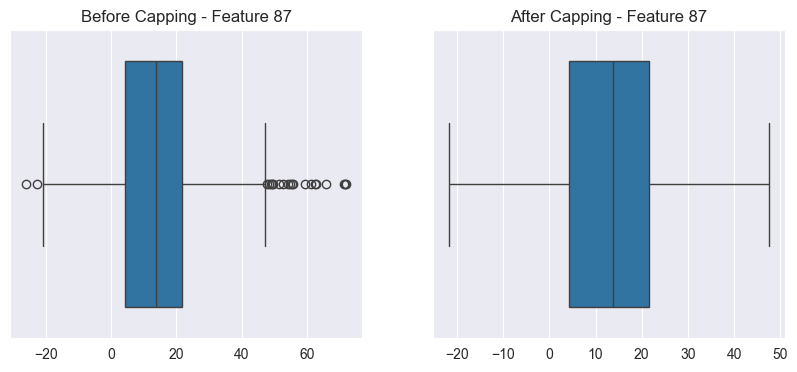

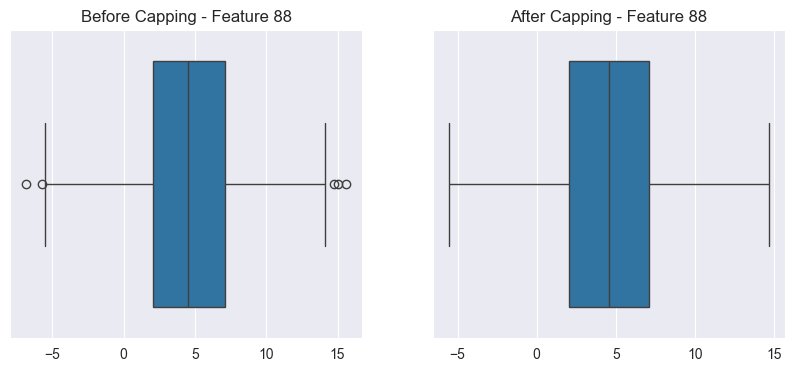

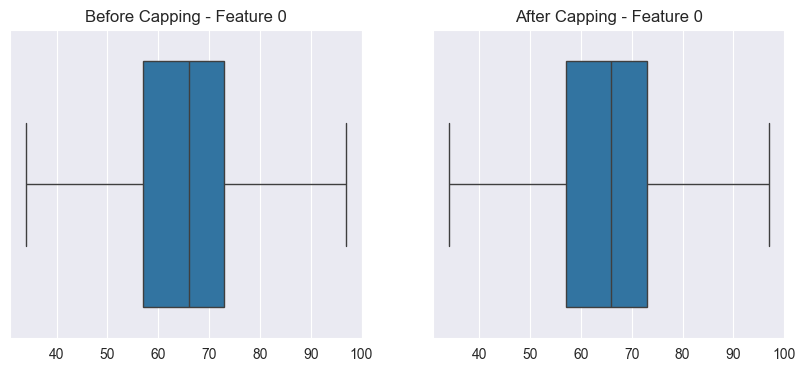

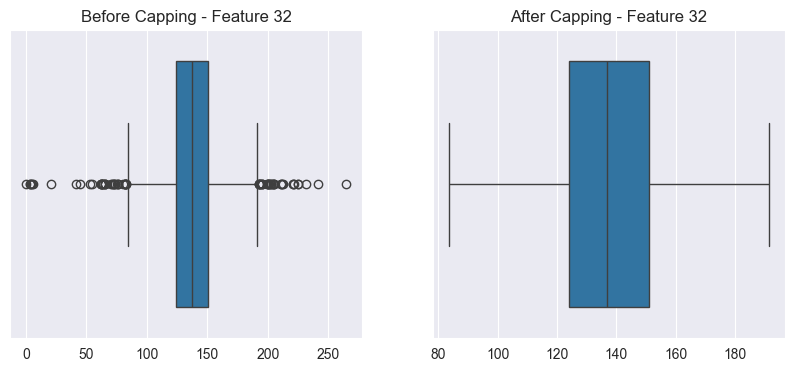

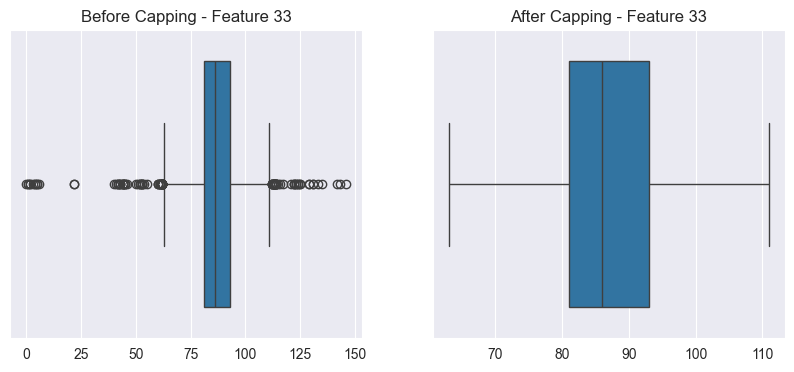

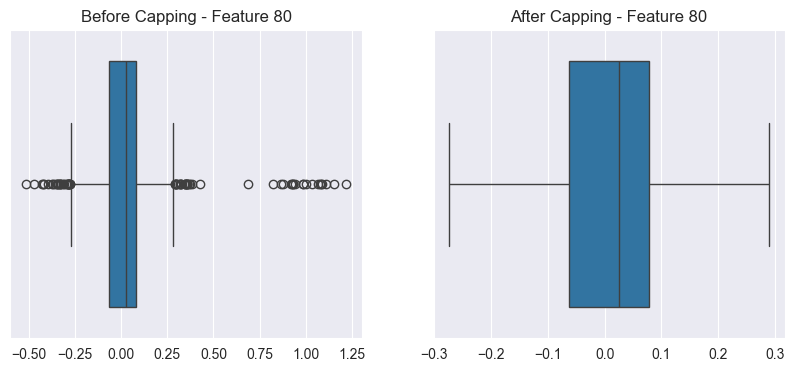

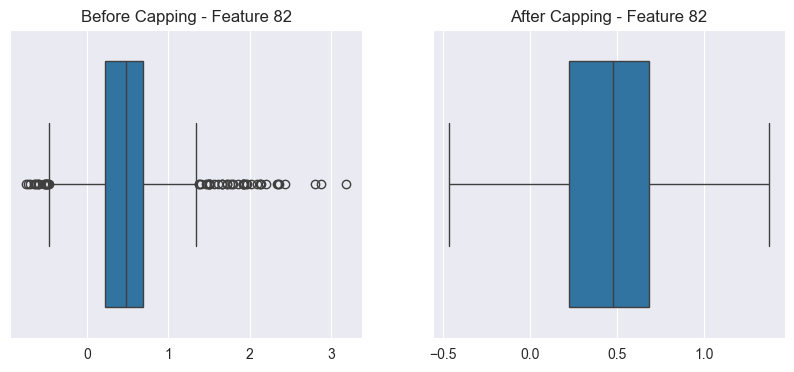

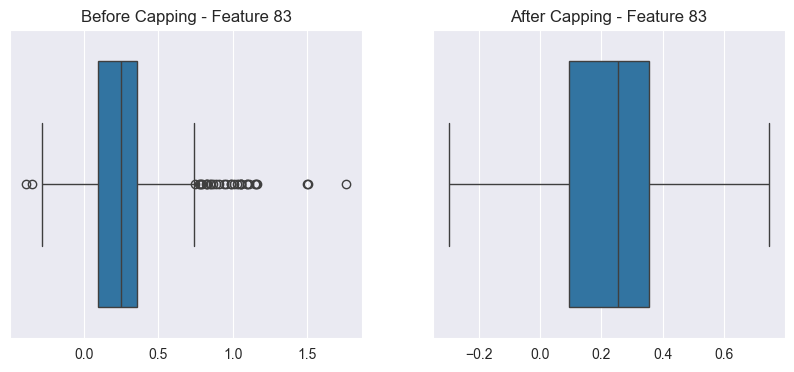

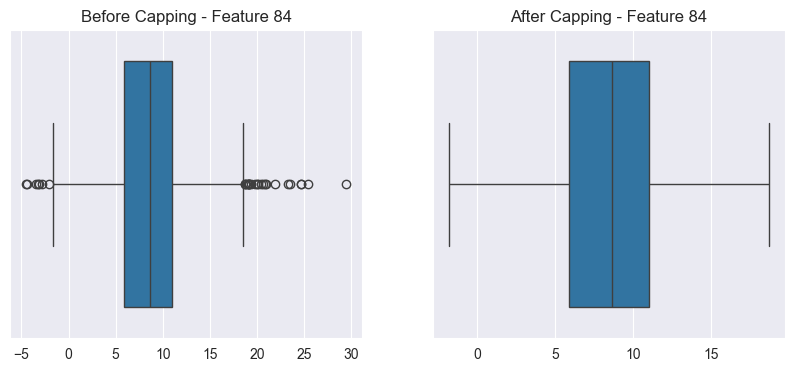

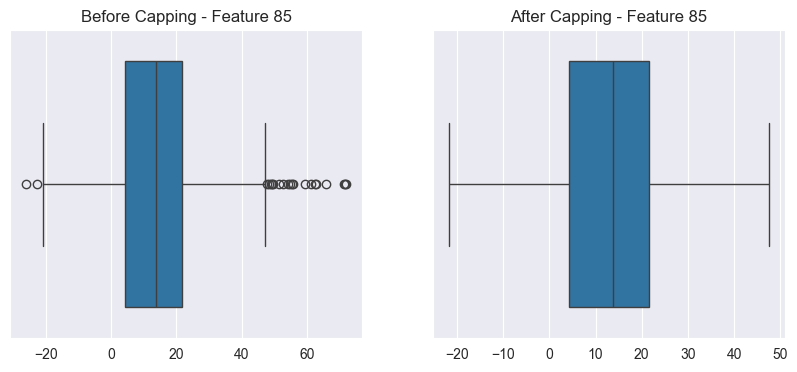

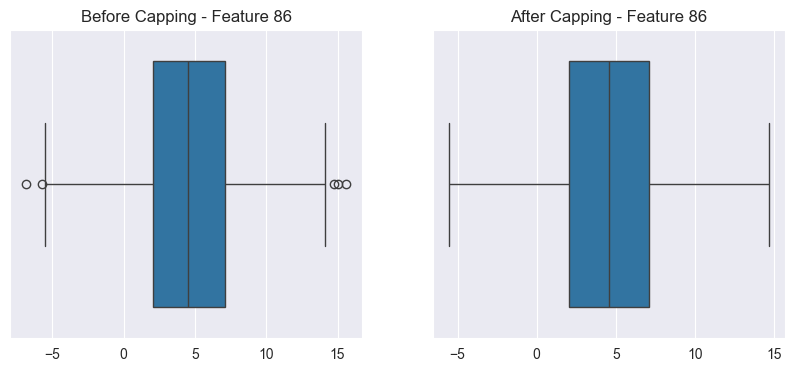

Reports for 90% threshold:
{0: {'outlier_count': 0, 'lower_bound': 33.0, 'upper_bound': 97.0}, 33: {'outlier_count': 339, 'lower_bound': 85.0, 'upper_bound': 85.0}, 34: {'outlier_count': 69, 'lower_bound': 83.5, 'upper_bound': 191.5}, 35: {'outlier_count': 106, 'lower_bound': 63.0, 'upper_bound': 111.0}, 82: {'outlier_count': 71, 'lower_bound': -0.2748618187409083, 'upper_bound': 0.28973254667942694}, 84: {'outlier_count': 59, 'lower_bound': -0.4652065281085307, 'upper_bound': 1.3717643156292263}, 85: {'outlier_count': 34, 'lower_bound': -0.29784390245428116, 'upper_bound': 0.7460439326742805}, 86: {'outlier_count': 30, 'lower_bound': -1.8266679308693563, 'upper_bound': 18.68313310651598}, 87: {'outlier_count': 21, 'lower_bound': -21.769618830052373, 'upper_bound': 47.550504123240344}, 88: {'outlier_count': 5, 'lower_bound': -5.555207891334424, 'upper_bound': 14.664037245832768}}
Capped outliers for 10 features

Reports for 60% threshold:
{0: {'outlier_count': 0, 'lower_bound': 33.0, '

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


def process_outliers(X):
    """
    Processes outliers for specified continuous features and reports details.
    
    Parameters:
    - X: The dataset to process outliers for.
    
    Returns:
    - X_processed: The dataset with outliers processed.
    - reports: A dictionary containing reports on processed features.
    """

    X = X.copy()

    discrete_indices, continuous_integer_indices, continuous_float_indices = classify_features(X)

    # Initialize the reports dictionary
    reports = {}

    # Combine continuous integer and float indices
    continuous_feature_indices = continuous_integer_indices + continuous_float_indices

    for feature_index in continuous_feature_indices:
        feature_data = X[:, feature_index]
        q1, q3 = np.percentile(feature_data[~np.isnan(feature_data)], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Detect outliers
        outlier_indices = np.where((feature_data < lower_bound) | (feature_data > upper_bound))[0]
        outlier_count = len(outlier_indices)

        # Visualize the box plot before capping
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.boxplot(x=feature_data)
        plt.title(f'Before Capping - Feature {feature_index}')

        # Cap the outliers
        feature_data_capped = np.where(feature_data < lower_bound, lower_bound,
                                       np.where(feature_data > upper_bound, upper_bound, feature_data))
        X[:, feature_index] = feature_data_capped

        # Visualize the box plot after capping
        plt.subplot(1, 2, 2)
        sns.boxplot(x=feature_data_capped)
        plt.title(f'After Capping - Feature {feature_index}')
        plt.show()

        # Update reports
        reports[feature_index] = {
            'outlier_count': outlier_count,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

    return X, reports


# Example usage
X_processed_90, reports_90 = process_outliers(X_filled_90)
X_processed_60, reports_60 = process_outliers(X_filled_60)

print("Reports for 90% threshold:")
print(reports_90)
print(f"Capped outliers for {len(reports_90)} features")
print("\nReports for 60% threshold:")
print(reports_60)
print(f"Capped outliers for {len(reports_60)} features")

np.save('../data_set/drop_90/X_processed.npy', X_processed_90)
np.save('../data_set/drop_60/X_processed.npy', X_processed_60)
